Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
import seaborn as sns

Downloading the training and testing dataset

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.tst

--2021-04-05 15:40:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 525830 (514K) [application/x-httpd-php]
Saving to: ‘sat.trn.8’

sat.trn.8           100%[===================>] 513.51K  1.47MB/s    in 0.3s    

2021-04-05 15:40:29 (1.47 MB/s) - ‘sat.trn.8’ saved [525830/525830]

--2021-04-05 15:40:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.tst
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236745 (231K) [application/x-httpd-php]
Saving to: ‘sat.tst.8’

sat.tst.8           100%[===================>] 231.20K   852KB/s    in 0.3s 

Reading and Storing training and testing dataframe 

In [3]:
train = pd.DataFrame(np.genfromtxt('sat.trn'))
train.rename(columns={train.columns[-1]: "Class" }, inplace=True)

In [4]:
print(train.head(20))

       0      1      2     3     4  ...    32     33     34    35  Class
0   92.0  115.0  120.0  94.0  84.0  ...  84.0  107.0  113.0  87.0    3.0
1   84.0  102.0  106.0  79.0  84.0  ...  84.0   99.0  104.0  79.0    3.0
2   84.0  102.0  102.0  83.0  80.0  ...  84.0   99.0  104.0  79.0    3.0
3   80.0  102.0  102.0  79.0  84.0  ...  84.0  103.0  104.0  79.0    3.0
4   84.0   94.0  102.0  79.0  80.0  ...  79.0  107.0  109.0  87.0    3.0
5   80.0   94.0   98.0  76.0  80.0  ...  79.0  107.0  109.0  87.0    3.0
6   76.0  102.0  106.0  83.0  76.0  ...  79.0  103.0  104.0  79.0    3.0
7   76.0  102.0  106.0  87.0  80.0  ...  79.0   95.0  100.0  79.0    3.0
8   76.0   89.0   98.0  76.0  76.0  ...  79.0   87.0   93.0  71.0    4.0
9   76.0   94.0   98.0  76.0  76.0  ...  79.0   87.0   93.0  67.0    4.0
10  76.0   98.0  102.0  72.0  76.0  ...  75.0   87.0   96.0  71.0    4.0
11  72.0   94.0   90.0  72.0  72.0  ...  71.0   87.0   89.0  67.0    4.0
12  72.0   89.0   94.0  76.0  72.0  ...  71.0   79.

In [5]:
test = pd.DataFrame(np.genfromtxt('sat.tst'))
test.rename(columns={test.columns[-1]: "Class" }, inplace=True)

In [6]:
print(test.sample(20))

         0      1      2      3     4  ...    32     33     34     35  Class
1578  78.0   91.0  100.0   81.0  86.0  ...  78.0  102.0  119.0   90.0    3.0
699   71.0   75.0   75.0   59.0  68.0  ...  66.0   71.0   73.0   55.0    7.0
1276  67.0  111.0  123.0   96.0  71.0  ...  63.0  108.0  119.0   98.0    1.0
1253  60.0   99.0  108.0   88.0  68.0  ...  70.0  113.0  122.0   96.0    1.0
419   49.0   34.0  122.0  118.0  49.0  ...  60.0   63.0   97.0   94.0    2.0
988   71.0   91.0   87.0   70.0  76.0  ...  74.0   87.0   88.0   70.0    4.0
1982  53.0   83.0   96.0   78.0  53.0  ...  52.0   75.0   92.0   78.0    1.0
318   92.0  106.0  115.0   91.0  88.0  ...  84.0   95.0   96.0   79.0    4.0
1561  55.0   75.0   96.0   79.0  55.0  ...  52.0   66.0   82.0   68.0    1.0
1737  63.0   95.0  110.0   90.0  63.0  ...  64.0   85.0   98.0   83.0    1.0
1262  55.0   64.0   81.0   67.0  67.0  ...  63.0   57.0   75.0   68.0    5.0
519   53.0   49.0   71.0   50.0  53.0  ...  55.0   51.0   67.0   50.0    5.0

In [7]:
print(train.columns[-1])

Class


# Training and Validation Split

Training and validation set split in 70:30 ratio.

In [8]:
from sklearn.model_selection import train_test_split
validation_size=0.3
x_train, x_val, y_train, y_val = train_test_split(train[train.columns[:-1]].to_numpy(), train[train.columns[-1]].to_numpy(), test_size=validation_size)

In [9]:
x_test = test[test.columns[:-1]].to_numpy()
y_test = test[test.columns[-1]].to_numpy()
print(type(x_test))

<class 'numpy.ndarray'>


(array([765., 320.,   0., 685.,   0., 298., 309.,   0.,   0., 727.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

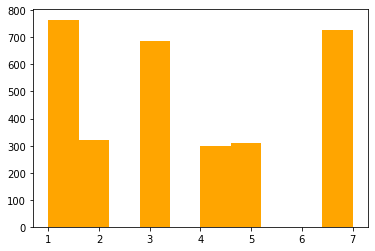

In [10]:
plt.hist(y_train,color='orange')

In [11]:
print(len(x_train),len(x_val),len(x_test))

3104 1331 2000


# TSNE Plot for data visualisaiton

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=40, random_state=4).fit_transform(train)

In [13]:
tsne_df = pd.DataFrame(tsne)
tsne_df.sample(10)

,0,1
1028,-48.179428,48.661606
4136,29.771801,-7.330412
2911,-2.779896,-17.445372
458,17.735361,5.958741
1037,-38.786060,38.900730
1086,-39.588642,-4.398350
1482,-49.302715,17.609726
2974,11.173964,-51.908539
1909,-3.444577,59.242107
4362,-23.806559,-30.159849


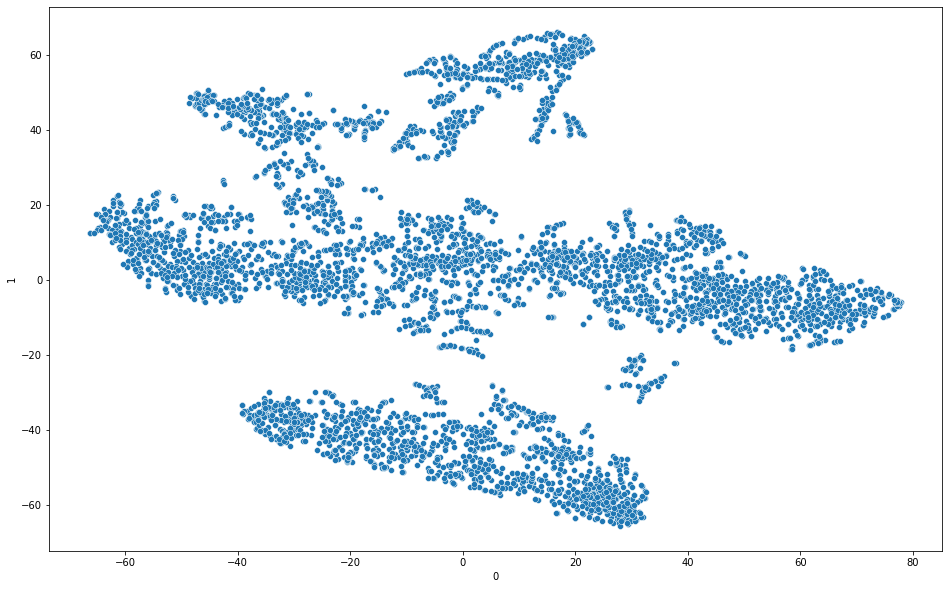

In [14]:
plt.figure(figsize=(16,10))
# colorsIdx = {'A': 'rgb(215,48,39)', 'B': 'rgb(215,148,39)'}
# cols      = ['orange','blue']
sns.scatterplot(
    x=0, y=1,
    palette=sns.color_palette("hls", 10),
    data=tsne_df,
    legend="full",
    alpha=1
)

In [15]:
# test_x = np.array([[1,2,3] , [-4,5,-6]])
# test_xt = np.array([[0,0,0], [1,2,3], [4,5,6], [-4, 4, -6]])
# test_yt = np.array([[1, 1, 2, 3]]).T

# kNN algorithm implementation from scratch

In [16]:
from scipy.spatial.distance import cdist

In [17]:
def getMatrix(y, k, classes):
    first_k_neighbors = y[:, :k]
    
    N1, N2 = y.shape
    number_of_classes = classes.shape[0]

    prob_matrix = np.zeros(shape=(N1, number_of_classes))

    for i, row in enumerate(first_k_neighbors):
        for j, value in enumerate(classes):
            prob_matrix[i][j] = list(row).count(value) / k

    return prob_matrix

In [18]:
def predict(X_test, X_train, y_train, k):
    order = cdist(X_test, X_train, metric="euclidean").argsort(kind='mergesort')

    sorted_labels = np.squeeze(y_train[order])
    classes = np.unique(sorted_labels)
    # print(classes)
    p_y_x = getMatrix(sorted_labels, k, classes)
    number_of_classes = p_y_x.shape[1]
    reversed_rows = np.fliplr(p_y_x)

    prediction = classes[number_of_classes - (np.argmax(reversed_rows, axis=1) + 1)]
    return prediction

In [19]:
from sklearn.metrics import classification_report, accuracy_score
y_predict = predict(x_val, x_train, y_train,10)
print(y_predict)

[2. 7. 3. ... 1. 1. 1.]


In [20]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       307
         2.0       0.98      0.96      0.97       159
         3.0       0.89      0.95      0.92       276
         4.0       0.69      0.57      0.63       117
         5.0       0.95      0.78      0.86       161
         7.0       0.82      0.90      0.86       311

    accuracy                           0.89      1331
   macro avg       0.88      0.86      0.87      1331
weighted avg       0.89      0.89      0.89      1331



# Finding Optimal value of k using grid search

In [21]:
# return accuracy for a particular k value when prediction is true by calulating the mean value
def get_acc(prediction, y_true):
    N1 = prediction.shape[0]
    accuracy = np.sum(prediction == y_true) / N1
    return accuracy

In [22]:
# returns optimal value of k from a given range of values
def kselector(x_val, y_val, x_train, y_train, k_values):
    accuracies = []

    for k in tqdm(k_values):
        prediction = predict(x_val, x_train, y_train, k)

        acc = get_acc(prediction, y_val)
        accuracies.append(acc)

    k_optimal = k_values[accuracies.index(max(accuracies))]

    return k_optimal, accuracies

In [23]:
k_range = np.arange(3,30,2)
best_k, accuracies = kselector(x_val, y_val, x_train, y_train, k_range)

100%|██████████| 14/14 [00:07<00:00,  1.83it/s]


In [24]:
import plotly.express as px
px.line(
    y=accuracies, 
    x= k_range, 
    title="Accuracy for k nearest neighbors",
    labels=dict(x="K Param", y="Accuracy")
    )

In [25]:
print("Optimal  value of k is:",best_k)

Optimal  value of k is: 5


In [26]:
y_pred = predict(x_test, x_train, y_train, best_k)

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       461
         2.0       0.97      0.97      0.97       224
         3.0       0.91      0.92      0.92       397
         4.0       0.71      0.68      0.69       211
         5.0       0.93      0.84      0.88       237
         7.0       0.84      0.88      0.86       470

    accuracy                           0.90      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.90      0.90      0.90      2000



In [28]:
y_valPred=predict(x_val,x_train,y_train,best_k)

In [29]:
print(classification_report(y_val, y_valPred))

              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       307
         2.0       0.98      0.99      0.98       159
         3.0       0.90      0.94      0.92       276
         4.0       0.71      0.62      0.66       117
         5.0       0.94      0.84      0.89       161
         7.0       0.85      0.90      0.88       311

    accuracy                           0.91      1331
   macro avg       0.89      0.88      0.88      1331
weighted avg       0.90      0.91      0.90      1331



# Comparing our model with sklearn

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
model = KNeighborsClassifier(5)
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
y_pred_skl = model.predict(x_test)

In [32]:
print(classification_report(y_test, y_pred_skl))

              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       461
         2.0       0.97      0.97      0.97       224
         3.0       0.90      0.94      0.92       397
         4.0       0.71      0.67      0.69       211
         5.0       0.92      0.83      0.87       237
         7.0       0.85      0.87      0.86       470

    accuracy                           0.90      2000
   macro avg       0.89      0.88      0.88      2000
weighted avg       0.90      0.90      0.90      2000



In [33]:
y_valPred_skl=model.predict(x_val)

In [34]:
print(classification_report(y_val, y_valPred_skl))

              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       307
         2.0       0.97      0.99      0.98       159
         3.0       0.90      0.96      0.93       276
         4.0       0.71      0.64      0.67       117
         5.0       0.96      0.83      0.89       161
         7.0       0.88      0.89      0.89       311

    accuracy                           0.91      1331
   macro avg       0.90      0.88      0.89      1331
weighted avg       0.91      0.91      0.91      1331



In [35]:
print("Testing Accuracy for sklearn:",accuracy_score(y_test, y_pred_skl))
print("Testing Accuracy for our model:",accuracy_score(y_test, y_pred))
print("\n")
print("Validation Accuracy for sklearn:",accuracy_score(y_val, y_valPred_skl))
print("Validation Accuracy for our model:",accuracy_score(y_val, y_valPred))

Testing Accuracy for sklearn: 0.897
Testing Accuracy for our model: 0.8975


Validation Accuracy for sklearn: 0.9113448534936138
Validation Accuracy for our model: 0.9060856498873028
